# Loading the packages:

In [1]:
from google.colab import drive
import os
import numpy as np
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
drive.mount('/content/drive')

Mounted at /content/drive


# Generating the data matrix and the label vector:

In [2]:
import pandas as pd
images_folder = '/content/drive/MyDrive/archive'

In [3]:
number_of_persons = 40
def read_image(image_path):
    ans = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'
        for i in range(10304):
            ans.append(ord(f.read(1)))
    return ans 
        
images = []
persons = []

path = '/content/drive/MyDrive/archive/'
for x in range(1, number_of_persons + 1):
    current_path = path + 's' + str(x) + '/'
    for y in range(1, 11):
        persons.append(str(x))
        images.append(read_image(current_path + str(y) + '.pgm'))
images = np.array(images)
        


In [ ]:
print(len(images))
print(len(persons))

400
400


# Splitting the data:

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(images)):
    if i%2==1 :
        x_train.append(images[i])
        y_train.append(persons[i])
    else:
        x_test.append(images[i])
        y_test.append(persons[i])

train_data = pd.DataFrame(x_train,index=y_train)

In [ ]:
train_data.shape

(200, 10304)

In [ ]:
train_data.head(20)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
1,60,60,62,53,48,51,61,60,71,68,...,27,35,28,33,31,31,37,32,34,34
1,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
1,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
1,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
1,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
2,37,35,35,37,36,37,35,36,37,37,...,26,28,26,28,24,26,27,26,28,28
2,34,36,35,36,33,36,36,38,36,38,...,25,25,24,27,25,27,22,32,25,25
2,34,35,35,40,36,39,38,34,37,39,...,26,27,23,29,26,27,26,31,24,24
2,34,39,35,38,34,41,37,36,35,39,...,139,143,144,134,139,142,128,135,138,148
2,37,34,38,36,38,34,38,36,38,37,...,172,152,137,144,135,140,146,135,143,133


In [ ]:
from sklearn.metrics import classification_report
def classify(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    print("Classification report: " )
    print(classification_report(y_test, y_predict))
    plt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20),title=f"Confusion matrix for k= {n_neighbors}");
    return acc

In [ ]:
def dimensionality(alpha, eig_values):
    r = 0
    i = 0
    for value in eig_values: 
        r = r + eig_values[i]
        i = i + 1
        if (r >= alpha*np.sum(eig_values)):
            break
    return i

def calculate_reduced_dimensions(alpha_values, eig_values):
    reduced_dimensions = []
    for alpha in alpha_values:
        reduced_dimensions.append(dimensionality(alpha, eig_values))
    return reduced_dimensions

def PCA(data, alpha_values,eig_vectors,eig_values):
    r = calculate_reduced_dimensions(alpha_values, eig_values)
    return r, eig_vectors

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.8 num of dim. equal: 37
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.93
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.71      1.00      0.83         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       1

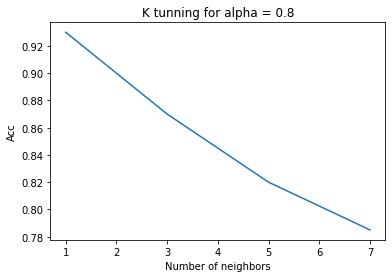

for alpha = 0.85 num of dim. equal: 53
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.94
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       

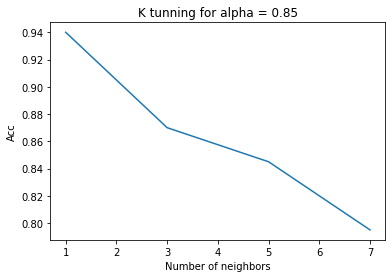

for alpha = 0.9 num of dim. equal: 77
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.945
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


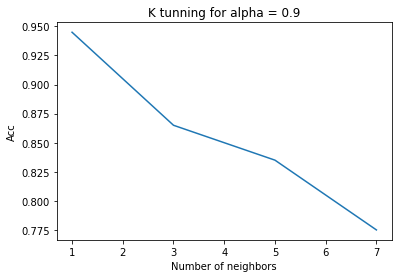

for alpha = 0.95 num of dim. equal: 116
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.935
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.71      1.00      0.83         5
          20       1.00      0.80      0.89         5
          21       1.00      1.00      1.00         5
          22       1.00      1.00      1.00         5
          23     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


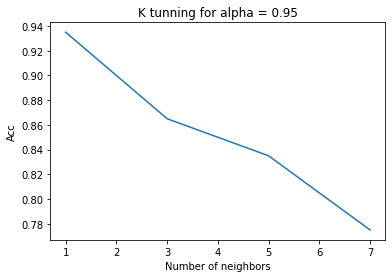

In [ ]:
from mlxtend.preprocessing import MeanCenterer
z= MeanCenterer().fit(train_data).transform(train_data)
cvm=np.cov(z.T,bias=True)
eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
mean = np.mean(train_data)
alpha = [0.8, 0.85, 0.9, 0.95]
r, eig_vectors = PCA(train_data, alpha,eig_vectors,eig_values)
for i in range (len(r)):
    U = eig_vectors[:,0:r[i]].T
    print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
    projected_train_data = np.array(np.matmul(z, U.T))
    projected_test_data = np.array(np.matmul(x_test - np.array(mean), U.T))
    accs = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        print(f"For k= {k}: ")
        acc=classify(projected_train_data, y_train, projected_test_data, y_test, k)
        accs.append(acc)

    plt.plot(k_values, accs)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title(f"K tunning for alpha = {alpha[i]}")
    plt.show()

# LDA

In [ ]:
def calculate_classes_mean(data, classes_count):
    original_dimensions = 10304
    mean_vector = dict()
    for label in range(1, classes_count + 1):
        label = str(label)
        person_data = data.loc[label]
        mean = np.mean(person_data)
        mean_vector[label] = mean
    return mean_vector

In [ ]:
def scatter_matrices(train_data, original_dimensions, classes_count):
    total_mean = np.mean(train_data)
    S = np.zeros((original_dimensions, original_dimensions))
    SB = np.zeros((original_dimensions, original_dimensions))
    mean_vector = dict()
    for label in range(1, classes_count + 1):   #calculating mean for each class
        label = str(label)
        person_data = train_data.loc[label]
        mean = np.mean(person_data)
        mean_vector[label] = mean

    for label in range(1, classes_count + 1):
        label = str(label)
        person_data = train_data.loc[label]
        mean_vector[label]
        print(person_data)
        Z = np.array(person_data - mean_vector[label])
        print("here")
        print(Z)
        S += Z.T.dot(Z)   #calculating S matrix
        print(S.shape)
        nk = person_data.shape[0]
        # Reshaping mean_diff
        mean_difference = np.array(mean_vector[label] - total_mean).reshape(original_dimensions, 1)
        SB += 5 * (mean_difference).dot(mean_difference.T)           # calculating Sb matrix
    return S, SB

In [ ]:
def LDA(n_components, data, original_dimensions, classes_count):
    S, SB = scatter_matrices(data, original_dimensions, classes_count)
    A = np.linalg.inv(S).dot(SB)
    eig_values, eig_vectors = np.linalg.eigh(A)
    # sort eigenvalues descendingly
    idx = eig_values.argsort()[::-1]   
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]

    # store first n eigenvectors
    U = eig_vectors[:, 0:n_components].T
    return U

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


   0      1      2      3      4      5      6      7      8      9      ...  \
1     60     60     62     53     48     51     61     60     71     68  ...   
1     63     53     35     36     33     34     31     35     39     43  ...   
1     43     50     41     58     78     83     67     48     44     46  ...   
1     44     43     32     32     30     30     38     40     48     66  ...   
1     34     34     33     32     38     40     39     49     54     57  ...   

   10294  10295  10296  10297  10298  10299  10300  10301  10302  10303  
1     27     35     28     33     31     31     37     32     34     34  
1    173    169    166    161    158    169    137     41     10     24  
1    167    164    164    162    159    156    155    158    153    169  
1     37     42     42     40     33     29     37     43     43     37  
1     42     44     38     30     37     30     36     37     40     33  

[5 rows x 10304 columns]
here
[[ 11.2  12.   21.4 ... -30.2 -22.  -25.4]
 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

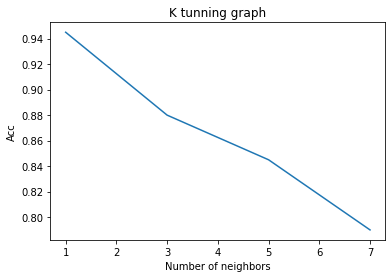

In [ ]:
U = LDA(39, train_data, 10304, number_of_persons)
projected_train_data = np.array(np.matmul(x_train, U.T))
projected_test_data = np.array(np.matmul(x_test, U.T))
k_values = [1, 3, 5, 7]
acc = []
for k in k_values:
    acc.append(classify(projected_train_data, y_train, projected_test_data, y_test, k))
plt.plot(k_values, acc)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title('K tunning graph')
plt.show()

# Faces and Non faces Classification

Import Non face data, resize:

In [ ]:
import random
import os
from PIL import Image

In [ ]:
rotations = random.sample(range(0,360,5), 10)
objects = random.sample(range(1, 101), 100)

In [ ]:
in_path = '/content/drive/MyDrive/coil-100/coil-100/'
out_path = '/content/drive/MyDrive/coil-100-resized/'

for (obj_idx,obj) in enumerate(objects):
    for (angle_idx, angle) in enumerate(rotations):
        filename = in_path + 'obj{}__{}.png'.format(obj, angle)
        dirname = 'obj' + str(obj_idx + 1)
        im = Image.open(filename)
        #display(im)
        im = im.resize((92,112)).convert("L")
        #display(im)
        if not os.path.exists(out_path + dirname):
            os.mkdir(out_path + dirname)
        # try saving as .pgm without specifying anything else
        im.save(out_path + dirname + '/{}.pgm'.format(angle_idx + 1))

In [ ]:
def read_single_image(image_path):
    ans = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'
        for i in range(10304):
            ans.append(ord(f.read(1)))
    return ans # np.array(ans, dtype='float')

In [ ]:
out_path = '/content/drive/MyDrive/coil-100-resized/'
def read_nonface_data(n_nonface):
    imagesn = []
    print('Reading Started')
    for x in range(1, n_nonface + 1):
        current_object_path = out_path + 'obj' + str(x) + '/'
        for y in range(1, 11):
            imagesn.append(read_single_image(current_object_path + str(y) + '.pgm'))
    print('Reading Finished')
    imagesn = np.array(imagesn)
    return imagesn, ['0']*n_nonface*10

Data concatenation

In [10]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
def classify2(X_train, y_train, X_test, y_test, n_neighbors,n_nonfaces):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    print("Classification report: " )
    print(classification_report(y_test, y_predict))
    conf_matrix = confusion_matrix(y_test, y_predict)
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(f"Confusion matrix for {n_neighbors} neighbours ", fontsize=18)
    plt.show()
    return acc

Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.9 num of dim. equal: 71
Acc for train--> 1.0
Acc for test--> 1.0
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



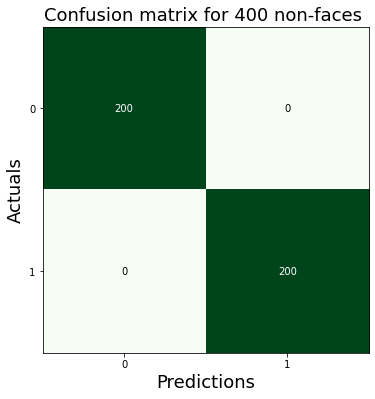

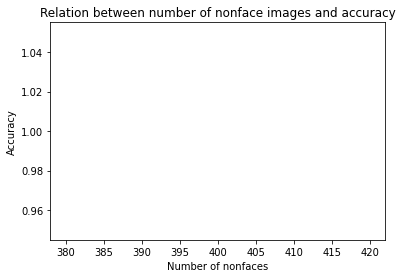

In [ ]:
from mlxtend.preprocessing import MeanCenterer
lst=[40]
lst2=[400]
accs = []
for x in lst:
  temp_D, temp_label = read_nonface_data(x)
  data = np.concatenate((images, temp_D), axis=0)
  labels = ['1']*len(images) + temp_label
  x_trainn = []
  y_trainn = []
  x_testn = []
  y_testn = []
  for i in range(len(data)):
      if i%2==1 :
          x_trainn.append(data[i])
          y_trainn.append(labels[i])
      else:
          x_testn.append(data[i])
          y_testn.append(labels[i])

  train_datan = pd.DataFrame(x_trainn,index=y_trainn)
  train_datan.shape

  z= MeanCenterer().fit(train_datan).transform(train_datan)
  cvm=np.cov(z.T,bias=True)
  eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
  mean = np.mean(train_datan)
  alpha = [0.9]
  r, eig_vectors = PCA(train_datan, alpha,eig_vectors,eig_values)
  for i in range (len(r)):
      U = eig_vectors[:,0:r[i]].T
      print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
      projected_train_data = np.array(np.matmul(z, U.T))
      projected_test_data = np.array(np.matmul(x_testn - np.array(mean), U.T))
      
      acc=classify2(projected_train_data, y_trainn, projected_test_data, y_testn, 1,x*10)
      accs.append(acc)

plt.plot(lst2, accs)
plt.xlabel('Number of nonfaces')
plt.ylabel('Accuracy')
plt.title(f"Relation between number of nonface images and accuracy")
plt.show()

Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.9 num of dim. equal: 70
Acc for train--> 1.0
Acc for test--> 1.0
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       200

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



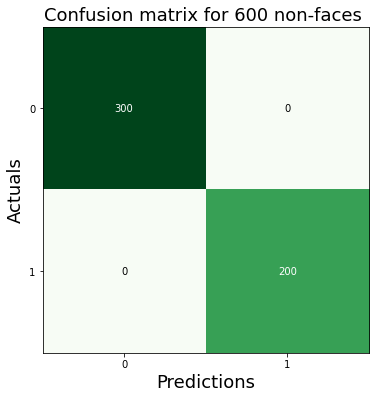

In [ ]:
from mlxtend.preprocessing import MeanCenterer
lst=[60]
lst2=[600]
for x in lst:
  temp_D, temp_label = read_nonface_data(x)
  data = np.concatenate((images, temp_D), axis=0)
  labels = ['1']*len(images) + temp_label
  x_trainn = []
  y_trainn = []
  x_testn = []
  y_testn = []
  for i in range(len(data)):
      if i%2==1 :
          x_trainn.append(data[i])
          y_trainn.append(labels[i])
      else:
          x_testn.append(data[i])
          y_testn.append(labels[i])

  train_datan = pd.DataFrame(x_trainn,index=y_trainn)
  train_datan.shape

  z= MeanCenterer().fit(train_datan).transform(train_datan)
  cvm=np.cov(z.T,bias=True)
  eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
  mean = np.mean(train_datan)
  alpha = [0.9]
  r, eig_vectors = PCA(train_datan, alpha,eig_vectors,eig_values)
  for i in range (len(r)):
      U = eig_vectors[:,0:r[i]].T
      print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
      projected_train_data = np.array(np.matmul(z, U.T))
      projected_test_data = np.array(np.matmul(x_testn - np.array(mean), U.T))
      
      acc=classify2(projected_train_data, y_trainn, projected_test_data, y_testn, 1,x*10)
      accs.append(acc)

# plt.plot(lst2, accs)
# plt.xlabel('Number of nonfaces')
# plt.ylabel('Accuracy')
# plt.title(f"Relation between number of nonface images and accuracy")
# plt.show()

In [ ]:
print(accs)

[0.9666666666666667, 0.925, 0.9, 0.8583333333333333]


Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.9 num of dim. equal: 72
Acc for train--> 1.0
Acc for test--> 0.9866666666666667
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       400
           1       0.96      1.00      0.98       200

    accuracy                           0.99       600
   macro avg       0.98      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600



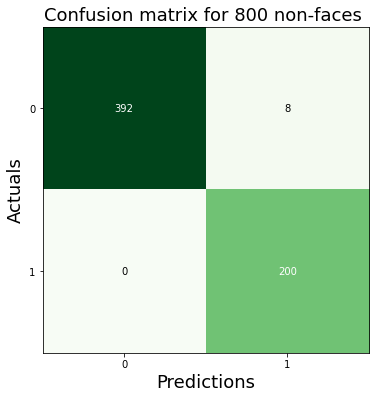

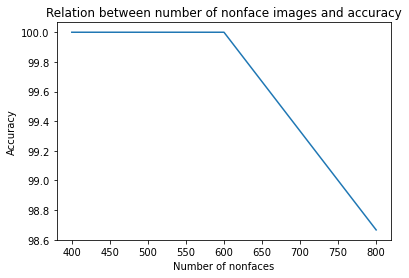

In [ ]:
from mlxtend.preprocessing import MeanCenterer
lst=[80]
lst2=[800]
list2=[400,600,800]
accs=[100,100]
for x in lst:
  temp_D, temp_label = read_nonface_data(x)
  data = np.concatenate((images, temp_D), axis=0)
  labels = ['1']*len(images) + temp_label
  x_trainn = []
  y_trainn = []
  x_testn = []
  y_testn = []
  for i in range(len(data)):
      if i%2==1 :
          x_trainn.append(data[i])
          y_trainn.append(labels[i])
      else:
          x_testn.append(data[i])
          y_testn.append(labels[i])

  train_datan = pd.DataFrame(x_trainn,index=y_trainn)
  train_datan.shape

  z= MeanCenterer().fit(train_datan).transform(train_datan)
  cvm=np.cov(z.T,bias=True)
  eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
  mean = np.mean(train_datan)
  alpha = [0.9]
  r, eig_vectors = PCA(train_datan, alpha,eig_vectors,eig_values)
  for i in range (len(r)):
      U = eig_vectors[:,0:r[i]].T
      print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
      projected_train_data = np.array(np.matmul(z, U.T))
      projected_test_data = np.array(np.matmul(x_testn - np.array(mean), U.T))
      
      acc=classify2(projected_train_data, y_trainn, projected_test_data, y_testn, 1,x*10)
      accs.append(acc*100)


plt.plot(list2, accs)
plt.xlabel('Number of nonfaces')
plt.ylabel('Accuracy')
plt.title(f"Relation between number of nonface images and accuracy")
plt.show()

In [ ]:
  print(type(labels[400]))

<class 'str'>


Splitting:

In [ ]:
x_trainn = []
y_trainn = []
x_testn = []
y_testn = []
for i in range(len(data)):
    if i%2==1 :
        x_trainn.append(data[i])
        y_trainn.append(labels[i])
    else:
        x_testn.append(data[i])
        y_testn.append(labels[i])

train_datan = pd.DataFrame(x_trainn,index=y_trainn)


In [ ]:
train_datan.shape

(400, 10304)

## PCA

PCA function:

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.8 num of dim. equal: 25
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 3: 
Acc for train--> 0.9975
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 5: 
Acc for train--> 0.9975
Acc for test--> 0.9925
Classification report: 
              precision    recall  f1-score   support

           0

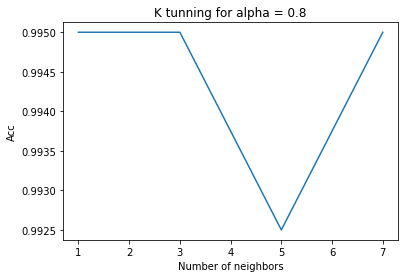

for alpha = 0.85 num of dim. equal: 40
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 3: 
Acc for train--> 1.0
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 5: 
Acc for train--> 0.9975
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0   

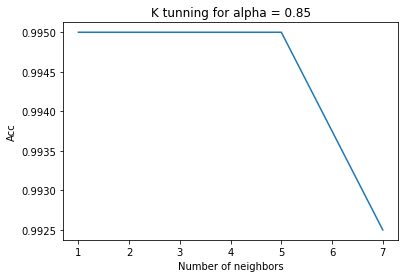

for alpha = 0.9 num of dim. equal: 70
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.9975
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

For k= 3: 
Acc for train--> 1.0
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 5: 
Acc for train--> 0.9975
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0   

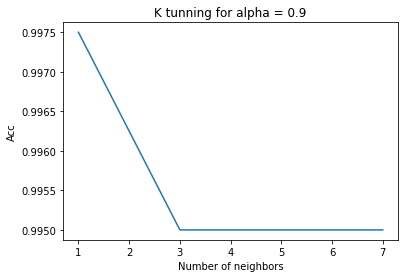

for alpha = 0.95 num of dim. equal: 136
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.9975
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

For k= 3: 
Acc for train--> 1.0
Acc for test--> 0.995
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       200
           1       0.99      1.00      1.00       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400

For k= 5: 
Acc for train--> 0.9975
Acc for test--> 0.9975
Classification report: 
              precision    recall  f1-score   support

           0

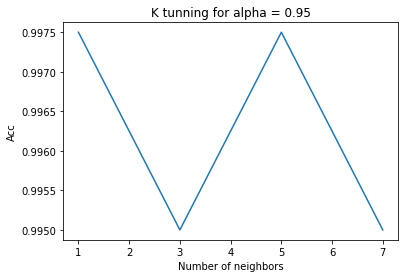

In [ ]:
from mlxtend.preprocessing import MeanCenterer
z= MeanCenterer().fit(train_datan).transform(train_datan)
cvm=np.cov(z.T,bias=True)
eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
mean = np.mean(train_datan)
alpha = [0.8, 0.85, 0.9, 0.95]
r, eig_vectors = PCA(train_datan, alpha,eig_vectors,eig_values)
for i in range (len(r)):
    U = eig_vectors[:,0:r[i]].T
    print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
    projected_train_data = np.array(np.matmul(z, U.T))
    projected_test_data = np.array(np.matmul(x_testn - np.array(mean), U.T))
    accs = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        print(f"For k= {k}: ")
        acc=classify(projected_train_data, y_trainn, projected_test_data, y_testn, k)
        accs.append(acc)

    plt.plot(k_values, accs)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title(f"K tunning for alpha = {alpha[i]}")
    plt.show()

## LDA

In [ ]:
x_trainn = []
y_trainn = []
x_testn = []
y_testn = []
for i in range(len(data)):
    if i%2==1 :
        x_trainn.append(data[i])
        y_trainn.append(labels[i])
    else:
        x_testn.append(data[i])
        y_testn.append(labels[i])

train_datan = pd.DataFrame(x_trainn,index=y_trainn)

In [ ]:
train_datan.head(-20)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
1,60,60,62,53,48,51,61,60,71,68,...,27,35,28,33,31,31,37,32,34,34
1,63,53,35,36,33,34,31,35,39,43,...,173,169,166,161,158,169,137,41,10,24
1,43,50,41,58,78,83,67,48,44,46,...,167,164,164,162,159,156,155,158,153,169
1,44,43,32,32,30,30,38,40,48,66,...,37,42,42,40,33,29,37,43,43,37
1,34,34,33,32,38,40,39,49,54,57,...,42,44,38,30,37,30,36,37,40,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,47,33,24,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
0,47,33,24,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
0,47,33,24,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
0,47,33,24,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [ ]:
def scatter_matrices2(train_data, original_dimensions, classes_count):
    total_mean = np.mean(train_data)
    S = np.zeros((original_dimensions, original_dimensions))
    SB = np.zeros((original_dimensions, original_dimensions))
    mean_vector = dict()
    for label in range(0, classes_count):
        label= str(label)   #calculating mean for each class
        person_data = train_data.loc[label]
        mean = np.mean(person_data)
        mean_vector[label] = mean

    for label in range(0, classes_count):
        label=str(label)
        person_data = train_data.loc[label]
        mean_vector[label]
        print(person_data)
        Z = np.array(person_data - mean_vector[label])
        print("here")
        print(Z)
        S += Z.T.dot(Z)   #calculating S matrix
        print(S.shape)
        nk = person_data.shape[0]
        # Reshaping mean_diff
        mean_difference = np.array(mean_vector[label] - total_mean).reshape(original_dimensions, 1)
        SB += 5 * (mean_difference).dot(mean_difference.T)           # calculating Sb matrix
    return S, SB

In [ ]:
def LDA2(n_components, data, original_dimensions, classes_count):
    S, SB = scatter_matrices2(data, original_dimensions, classes_count)
    A = np.linalg.inv(S).dot(SB)
    eig_values, eig_vectors = np.linalg.eigh(A)
    # sort eigenvalues descendingly
    idx = eig_values.argsort()[::-1]   
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]

    # store first n eigenvectors
    U = eig_vectors[:, 0:n_components].T
    return U

Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


    0      1      2      3      4      5      6      7      8      9      ...  \
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     34     25     26     26     26     26     26     26     26  ...   
0      47     35     26     27     27     27     27     27     28     29  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
0      47     33     24     25     25     25     23     22     23     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     34     25     26     26     26     24     23     22     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   

    10294  10295  10296  10

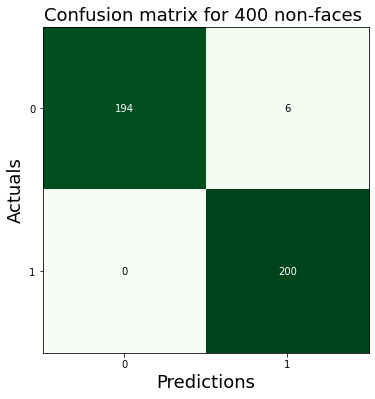

Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


    0      1      2      3      4      5      6      7      8      9      ...  \
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     34     25     26     26     26     26     26     26     26  ...   
0      47     35     26     27     27     27     27     27     28     29  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   

    10294  10295  10296  10

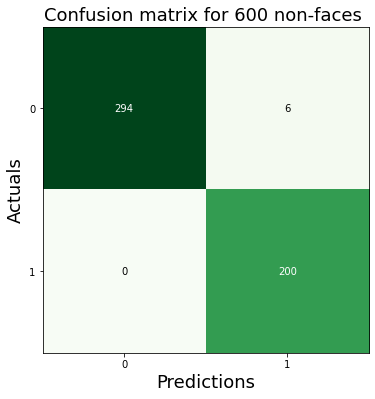

Reading Started
Reading Finished


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


    0      1      2      3      4      5      6      7      8      9      ...  \
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     34     25     26     26     26     26     26     26     26  ...   
0      47     35     26     27     27     27     27     27     28     29  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
0      47     33     24     25     25     25     25     25     25     25  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   
0      47     35     27     28     28     28     28     28     28     28  ...   
0      47     35     26     27     27     27     27     27     27     27  ...   

    10294  10295  10296  10

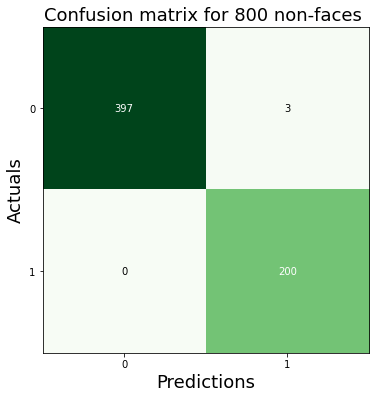

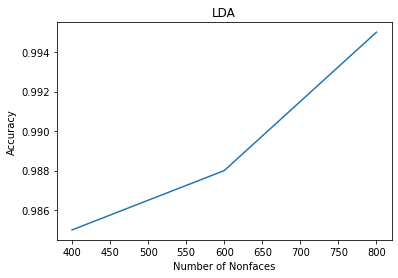

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
lst=[40,60,80]
lst2=[400,600,800]
accs = []
for x in lst:
  temp_D, temp_label = read_nonface_data(x)
  data = np.concatenate((images, temp_D), axis=0)
  labels = ['1']*len(images) + temp_label
  x_trainn = []
  y_trainn = []
  x_testn = []
  y_testn = []
  for i in range(len(data)):
      if i%2==1 :
          x_trainn.append(data[i])
          y_trainn.append(labels[i])
      else:
          x_testn.append(data[i])
          y_testn.append(labels[i])

  train_datan = pd.DataFrame(x_trainn,index=y_trainn)
  train_datan.shape

  U = LDA2(39, train_datan, 10304, 2)
  projected_train_data = np.array(np.matmul(x_trainn, U.T))
  projected_test_data = np.array(np.matmul(x_testn, U.T))
  k_values = [1]
  for k in k_values:
      print(f"For k= {k}: ")
      acc=classify2(projected_train_data, y_trainn, projected_test_data, y_testn, k,x*10)
      accs.append(acc)
plt.plot(lst2, accs)
plt.xlabel('Number of Nonfaces')
plt.ylabel('Accuracy')
plt.title('LDA')
plt.show()

# Bonus Task

## Applying different training and test splits:

In [ ]:
x_trainB = [images[0]]
y_trainB = [persons[0]]
x_testB = []
y_testB = []
for i in range(1,len(images)):
    if i%3==0 and i%10 !=0:
        x_testB.append(images[i])
        y_testB.append(persons[i])
    else:
        x_trainB.append(images[i])
        y_trainB.append(persons[i])

train_dataB = pd.DataFrame(x_trainB,index=y_trainB)


In [ ]:
train_dataB.shape

(280, 10304)

In [ ]:
from sklearn.metrics import classification_report
def classify(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    print("Classification report: " )
    print(classification_report(y_test, y_predict))
    #skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20),title=f"Confusion matrix for k= {n_neighbors}");
    return acc

In [ ]:
def dimensionality(alpha, eig_values):
    r = 0
    i = 0
    for value in eig_values: 
        r = r + eig_values[i]
        i = i + 1
        if (r >= alpha*np.sum(eig_values)):
            break
    return i

def calculate_reduced_dimensions(alpha_values, eig_values):
    reduced_dimensions = []
    for alpha in alpha_values:
        reduced_dimensions.append(dimensionality(alpha, eig_values))
    return reduced_dimensions

def PCA(data, alpha_values,eig_vectors,eig_values):
    r = calculate_reduced_dimensions(alpha_values, eig_values)
    return r, eig_vectors

### PCA

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.8 num of dim. equal: 40
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.975
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


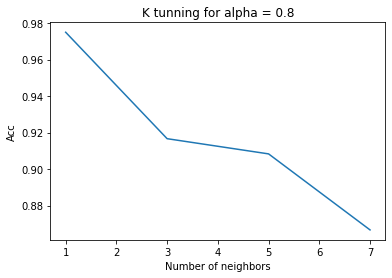

for alpha = 0.85 num of dim. equal: 59
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.975
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


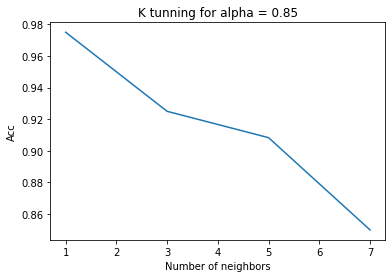

for alpha = 0.9 num of dim. equal: 92
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.975
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


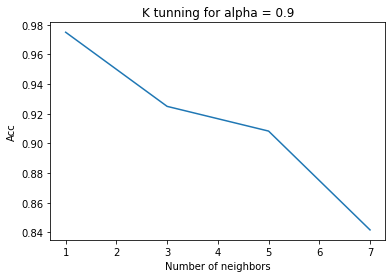

for alpha = 0.95 num of dim. equal: 148
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.975
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23     

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classificat

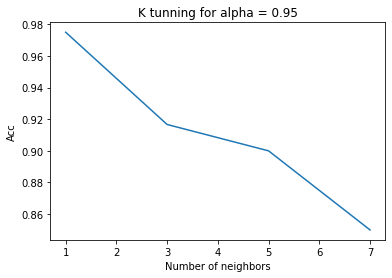

In [ ]:
from mlxtend.preprocessing import MeanCenterer
z= MeanCenterer().fit(train_dataB).transform(train_dataB)
cvm=np.cov(z.T,bias=True)
eig_vectors, eig_values, V = np.linalg.svd(cvm, full_matrices=True)
mean = np.mean(train_dataB)
alpha = [0.8, 0.85, 0.9, 0.95]
r, eig_vectors = PCA(train_dataB, alpha,eig_vectors,eig_values)
for i in range (len(r)):
    U = eig_vectors[:,0:r[i]].T
    print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
    projected_train_data = np.array(np.matmul(z, U.T))
    projected_test_data = np.array(np.matmul(x_testB - np.array(mean), U.T))
    accs = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        print(f"For k= {k}: ")
        acc=classify(projected_train_data, y_trainB, projected_test_data, y_testB, k)
        accs.append(acc)

    plt.plot(k_values, accs)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title(f"K tunning for alpha = {alpha[i]}")
    plt.show()

### LDA

In [ ]:
def scatter_matrices(train_data, original_dimensions, classes_count):
    total_mean = np.mean(train_data)
    S = np.zeros((original_dimensions, original_dimensions))
    SB = np.zeros((original_dimensions, original_dimensions))
    mean_vector = dict()
    for label in range(1, classes_count + 1):   #calculating mean for each class
        label = str(label)
        person_data = train_data.loc[label]
        mean = np.mean(person_data)
        mean_vector[label] = mean

    for label in range(1, classes_count + 1):
        label = str(label)
        person_data = train_data.loc[label]
        mean_vector[label]
        print(person_data)
        Z = np.array(person_data - mean_vector[label])
        print("here")
        print(Z)
        S += Z.T.dot(Z)   #calculating S matrix
        print(S.shape)
        nk = person_data.shape[0]
        # Reshaping mean_diff
        mean_difference = np.array(mean_vector[label] - total_mean).reshape(original_dimensions, 1)
        SB += 5 * (mean_difference).dot(mean_difference.T)           # calculating Sb matrix
    return S, SB

In [ ]:
def LDA(n_components, data, original_dimensions, classes_count):
    S, SB = scatter_matrices(data, original_dimensions, classes_count)
    A = np.linalg.inv(S).dot(SB)
    eig_values, eig_vectors = np.linalg.eigh(A)
    # sort eigenvalues descendingly
    idx = eig_values.argsort()[::-1]   
    eig_values = eig_values[idx]
    eig_vectors = eig_vectors[:,idx]

    # store first n eigenvectors
    U = eig_vectors[:, 0:n_components].T
    return U

In [ ]:
U = LDA(39, train_dataB, 10304, number_of_persons)
projected_train_data = np.array(np.matmul(x_trainB, U.T))
projected_test_data = np.array(np.matmul(x_testB, U.T))
# k_values = [1, 3, 5, 7]
# accs = []
# for k in k_values:
#     print(f"For k= {k}: ")
#     acc=classify2(projected_train_data, y_trainB, projected_test_data, y_testB, k,1)
#     accs.append(acc)
# plt.plot(k_values, accs)
# plt.xlabel('Number of neighbors')
# plt.ylabel('Acc')
# plt.title('K tunning graph')
# plt.show()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


   0      1      2      3      4      5      6      7      8      9      ...  \
1     48     49     45     47     49     57     39     42     53     49  ...   
1     60     60     62     53     48     51     61     60     71     68  ...   
1     39     44     53     37     61     48     61     45     35     40  ...   
1     64     76     80     53     34     72     60     66     66     50  ...   
1     43     50     41     58     78     83     67     48     44     46  ...   
1     44     43     32     32     30     30     38     40     48     66  ...   
1     42     41     44     46     48     39     37     37     33     37  ...   

   10294  10295  10296  10297  10298  10299  10300  10301  10302  10303  
1     39     44     40     41     49     42     44     47     46     46  
1     27     35     28     33     31     31     37     32     34     34  
1     23     30     36     32     28     32     31     29     26     29  
1     31     28     34     32     35     34     35     35     3

For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.9666666666666667
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.00 

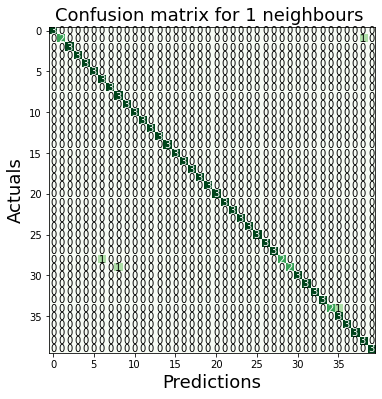

For k= 3: 
Acc for train--> 0.9785714285714285
Acc for test--> 0.925
Classification report: 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      1.00      1.0

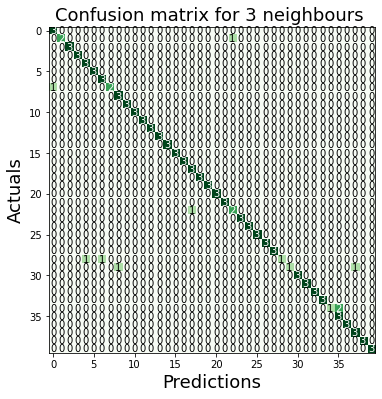

For k= 5: 
Acc for train--> 0.9464285714285714
Acc for test--> 0.9
Classification report: 
              precision    recall  f1-score   support

           1       0.75      1.00      0.86         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       0.75      1.00      0.86         3
          14       1.00      1.00      1.00         3
          15       0.60      1.00      0.75         3
          16       1.00      0.67      0.80         3
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       0.75      1.00      0.86 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


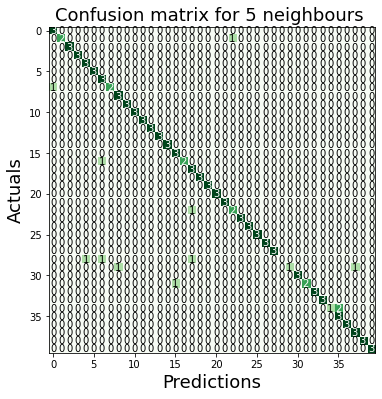

For k= 7: 
Acc for train--> 0.9214285714285714
Acc for test--> 0.8583333333333333
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
          10       1.00      0.67      0.80         3
          11       0.75      1.00      0.86         3
          12       1.00      1.00      1.00         3
          13       0.60      1.00      0.75         3
          14       1.00      0.67      0.80         3
          15       0.60      1.00      0.75         3
          16       1.00      0.67      0.80         3
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         3
          22       1.00      1.00      1.00         3
          23       1.00      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


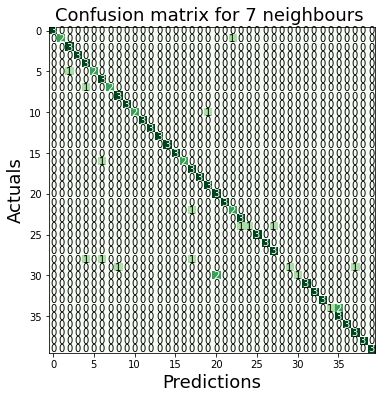

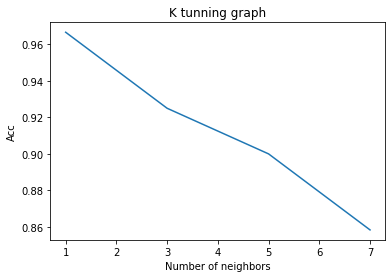

In [ ]:
k_values = [1, 3, 5, 7]
accs = []
for k in k_values:
    print(f"For k= {k}: ")
    acc=classify2(projected_train_data, y_trainB, projected_test_data, y_testB, k,1)
    accs.append(acc)
plt.plot(k_values, accs)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title('K tunning graph')
plt.show()

## PCA Variation: Randomized PCA
1. Scalability: Randomized PCA can handle large datasets that are not possible to fit into memory using traditional PCA.

2. Speed: Randomized PCA is much faster than traditional PCA for large datasets, making it more suitable for real-time applications.

3. Sparsity: Randomized PCA is able to handle sparse datasets, which traditional PCA is not able to handle well.

4. Low-rank approximation: Randomized PCA can be used to obtain a low-rank approximation of a large dataset, which can then be used for further analysis or visualization.

In [4]:
x_train = []
y_train = []
x_test = []
y_test = []
for i in range(len(images)):
    if i%2==1 :
        x_train.append(images[i])
        y_train.append(persons[i])
    else:
        x_test.append(images[i])
        y_test.append(persons[i])

train_data = pd.DataFrame(x_train,index=y_train)

In [ ]:
train_data.shape

(200, 10304)

In [ ]:
from sklearn.metrics import classification_report
def classify(X_train, y_train, X_test, y_test, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    print(f"Acc for train--> {model.score(X_train, y_train)}")
    acc = model.score(X_test, y_test)
    print(f"Acc for test--> {acc}")
    print("Classification report: " )
    print(classification_report(y_test, y_predict))
    #skplt.metrics.plot_confusion_matrix(y_test, y_predict, figsize=(20, 20),title=f"Confusion matrix for k= {n_neighbors}");
    return acc

In [ ]:
def dimensionality(alpha, eig_values):
    r = 0
    i = 0
    for value in eig_values: 
        r = r + eig_values[i]
        i = i + 1
        if (r >= alpha*np.sum(eig_values)):
            break
    return i

def calculate_reduced_dimensions(alpha_values, eig_values):
    reduced_dimensions = []
    for alpha in alpha_values:
        reduced_dimensions.append(dimensionality(alpha, eig_values))
    return reduced_dimensions

def PCA(data, alpha_values,eig_vectors,eig_values):
    r = calculate_reduced_dimensions(alpha_values, eig_values)
    return r, eig_vectors

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


for alpha = 0.8 num of dim. equal: 32
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.925
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.71      1.00      0.83         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       0.83      1.00      0.91         5
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


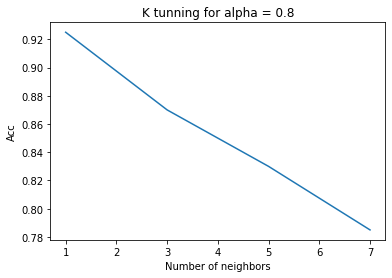

for alpha = 0.85 num of dim. equal: 46
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.935
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


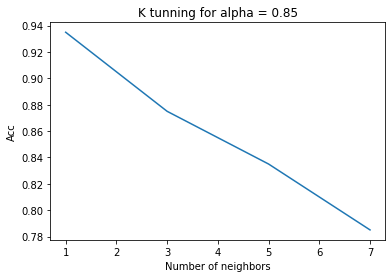

for alpha = 0.9 num of dim. equal: 66
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.945
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


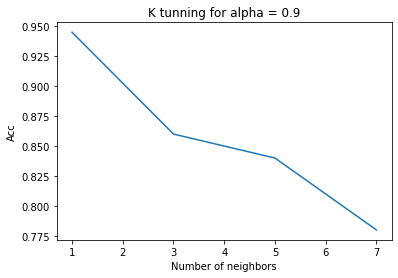

for alpha = 0.95 num of dim. equal: 97
For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.94
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       0.83      1.00      0.91         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5
          20       1.00      0.80      0.89         5
          21       1.00      1.00      1.00         5
          22       1.00      1.00      1.00         5
          23       

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


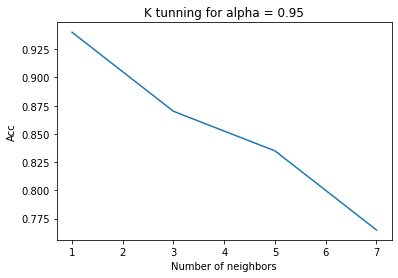

In [ ]:
from mlxtend.preprocessing import MeanCenterer
from sklearn.utils.extmath import randomized_svd
z= MeanCenterer().fit(train_data).transform(train_data)
cvm=np.cov(z.T,bias=True)
eig_vectors, eig_values, V = randomized_svd(cvm, n_components=150)
mean = np.mean(train_data)
alpha = [0.8, 0.85, 0.9, 0.95]
r, eig_vectors = PCA(train_data, alpha,eig_vectors,eig_values)
for i in range (len(r)):
    U = eig_vectors[:,0:r[i]].T
    print(f"for alpha = {alpha[i]} num of dim. equal: {r[i]}")
    projected_train_data = np.array(np.matmul(z, U.T))
    projected_test_data = np.array(np.matmul(x_test - np.array(mean), U.T))
    accs = []
    k_values = [1, 3, 5, 7]
    for k in k_values:
        print(f"For k= {k}: ")
        acc=classify(projected_train_data, y_train, projected_test_data, y_test, k)
        accs.append(acc)

    plt.plot(k_values, accs)
    plt.xlabel('Number of neighbors')
    plt.ylabel('Acc')
    plt.title(f"K tunning for alpha = {alpha[i]}")
    plt.show()

## LDA Variation: QDA

For k= 1: 
Acc for train--> 1.0
Acc for test--> 0.955
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       0.83      1.00      0.91         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       1.00      1.00      1.00         5
          19       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
          20       1.00      1.00      1.00         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       0.80      0.80      0.80         5
   

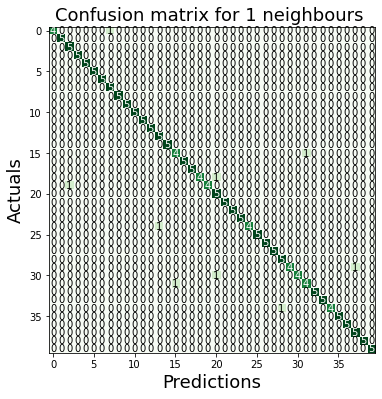

For k= 3: 
Acc for train--> 0.97
Acc for test--> 0.935
Classification report: 
              precision    recall  f1-score   support

           1       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       0.83      1.00      0.91         5
          19       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         5
          20       1.00      1.00      1.00         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       1.00      0.60      0.75         5
  

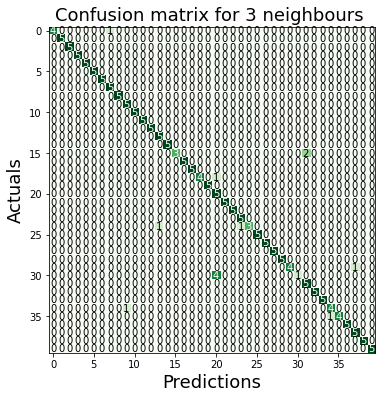

For k= 5: 
Acc for train--> 0.98
Acc for test--> 0.91
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       0.83      1.00      0.91         5
          19       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
          20       1.00      1.00      1.00         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       1.00      0.40      0.57         5
   

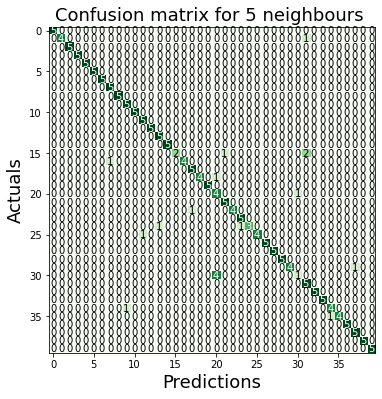

For k= 7: 
Acc for train--> 0.96
Acc for test--> 0.915
Classification report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
          10       1.00      0.80      0.89         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.00         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       0.83      1.00      0.91         5
          17       1.00      1.00      1.00         5
          18       0.83      1.00      0.91         5
          19       1.00      1.00      1.00         5
           2       0.83      1.00      0.91         5
          20       1.00      1.00      1.00         5
          21       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         5
          23       1.00      0.60      0.75         5
  

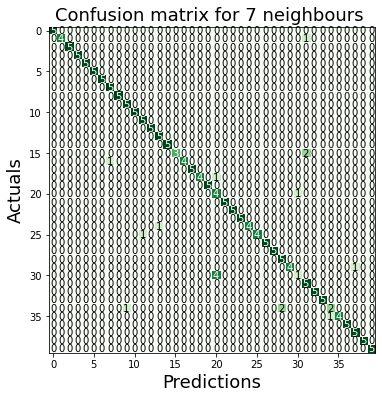

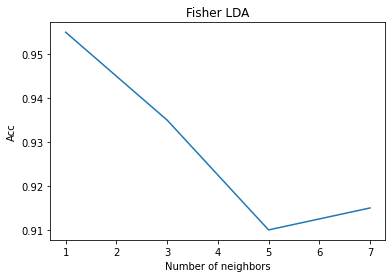

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report
lda = LDA(n_components=20, solver='svd')
projected_train_data = lda.fit_transform(x_train, y_train)
projected_test_data = lda.transform(x_test)
accs = []
k_values = [1, 3, 5, 7]
for k in k_values:
    print(f"For k= {k}: ")
    acc=classify2(projected_train_data, y_train, projected_test_data, y_test, k,1)
    accs.append(acc)

plt.plot(k_values, accs)
plt.xlabel('Number of neighbors')
plt.ylabel('Acc')
plt.title(f"Fisher LDA")
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()
Classification report: 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
          10       0.12      0.20      0.15         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         5
          15       0.07      0.20      0.10         5
          16       0.00      0.00      0.00         5
          17       0.14      0.20      0.17         5
          18       0.00      0.00      0.00         5
          19       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         5
          21       0.00      0.00      0.00         5
          22       0.00      0.00      0.00         5
          23       0.00      0.00      0.00         5
          24       0.00  

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


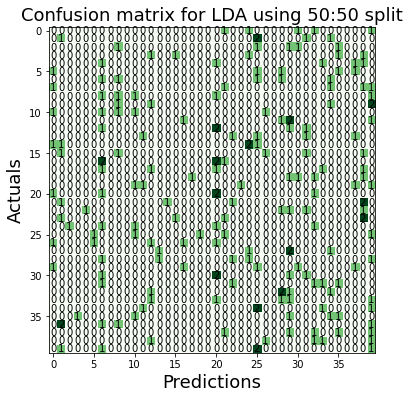

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(x_train, y_train)
print(model)
expected_y  = y_test
predicted_y = model.predict(x_test)
print("Classification report: " )
print(classification_report(y_test, predicted_y))
conf_matrix = confusion_matrix(y_test, predicted_y)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(f"Confusion matrix for LDA using 50:50 split", fontsize=18)
plt.show()